In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('naturalDisaster.csv')
df.head()

,Country,Extreme temperature,Wildfire,Storms,Landslides,Mass movement (dry),Volcanic activity,Earthquakes,Flood,Drought
0,Afghanistan,4.50,0.0,15.10,84.80,0.0,0.0,21.70,137.00,0.00
1,Africa,14.50,7.1,291.60,242.50,0.0,0.0,3.10,724.50,"2,000.00"
2,Albania,1.10,0.0,0.00,0.00,0.0,0.0,5.10,0.40,0.00
3,Algeria,0.80,0.0,0.00,0.00,0.0,0.0,0.60,9.70,0.00
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.drop(['Extreme temperature','Mass movement (dry)','Volcanic activity','Drought'], axis = 1, inplace = True)

In [17]:
df = df[df["Country"].str.contains("income")==False]

In [18]:
df.head()

,Country,Wildfire,Storms,Landslides,Earthquakes,Flood
0,Afghanistan,0.0,15.10,84.80,21.70,137.00
1,Africa,7.1,291.60,242.50,3.10,724.50
2,Albania,0.0,0.00,0.00,5.10,0.40
3,Algeria,0.0,0.00,0.00,0.60,9.70
4,American Samoa,NaN,NaN,NaN,NaN,NaN


In [19]:
df['Flood'] = pd.to_numeric(df['Flood'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 225
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      222 non-null    object 
 1   Wildfire     203 non-null    float64
 2   Storms       203 non-null    object 
 3   Landslides   203 non-null    object 
 4   Earthquakes  203 non-null    object 
 5   Flood        200 non-null    float64
dtypes: float64(2), object(4)
memory usage: 12.1+ KB


In [20]:
df = df.replace(np.nan, 0)

In [21]:
df= df[df['Flood'] > 150]

In [22]:
df

,Country,Wildfire,Storms,Landslides,Earthquakes,Flood
1,Africa,7.1,291.60,242.50,3.10,724.5
26,Brazil,0.0,0.40,3.00,0.00,161.6
40,China,5.2,159.30,274.70,421.90,622.7
148,Pakistan,0.0,13.80,21.20,79.20,484.5
184,South America,7.9,8.50,101.90,128.40,389.1


In [23]:
df['Flood'].sort_values()

26     161.6
184    389.1
148    484.5
40     622.7
1      724.5
Name: Flood, dtype: float64

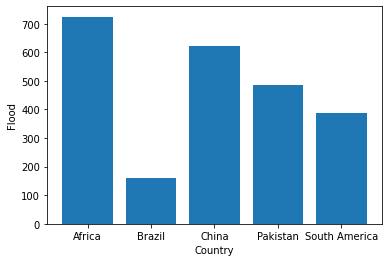

In [24]:
x = df['Country']
y = df['Flood']

plt.xlabel('Country')
plt.ylabel('Flood')
plt.bar(x,y)
plt.show()